In [1]:
from rapidz import Stream
from shed import FromEventStream, ToEventStream

from bluesky import RunEngine
from ophyd.sim import hw
hw = hw()
import operator as op
RE = RunEngine()
import bluesky.plans as bp
from pprint import pprint
from databroker import Broker
db = Broker.named('temp')

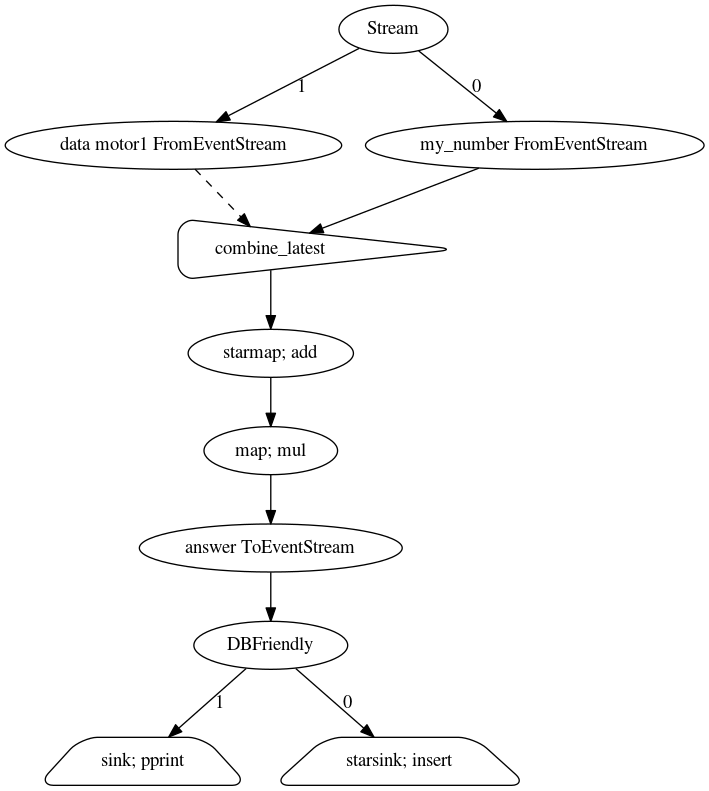

In [2]:
source = Stream()

# pull data out of the start document
my_number = FromEventStream('start', 'my_number', upstream=source)
# pull data out of the events
data = FromEventStream('event', ('data', 'motor1'), upstream=source, principle=True)

# starmap is the same as map(lambda x: f(*x))
output = data.combine_latest(my_number, emit_on=0).starmap(op.add).map(op.mul, 5)
finish = ToEventStream(output, 'answer')
dbf = finish.DBFriendly()
dbf.starsink(db.insert)
dbf.sink(pprint)
finish.visualize()

In [3]:
token = RE.subscribe(lambda *x: source.emit(x))
t2 = RE.subscribe(db.insert)
RE(bp.scan([hw.motor1], hw.motor1, 0, 10, 2, md={'my_number': 5}))
RE.unsubscribe(token)
RE.unsubscribe(t2)

('start',
 {'env': {'packages': [{'base_url': 'https://repo.continuum.io/pkgs/pro',
                        'build_number': 0,
                        'build_string': '0',
                        'channel': 'pkgs/pro',
                        'dist_name': 'accelerate_cudalib-2.0-0',
                        'name': 'accelerate_cudalib',
                        'platform': 'linux-64',
                        'version': '2.0'},
                       {'base_url': 'https://conda.anaconda.org/conda-forge',
                        'build_number': 0,
                        'build_string': 'py_0',
                        'channel': 'conda-forge',
                        'dist_name': 'alabaster-0.7.12-py_0',
                        'name': 'alabaster',
                        'platform': 'noarch',
                        'version': '0.7.12'},
                       {'base_url': 'https://conda.anaconda.org/conda-forge',
                        'build_number': 1,
                        'build_s

                        'build_string': 'py_0',
                        'channel': 'conda-forge',
                        'dist_name': 'boltons-18.0.1-py_0',
                        'name': 'boltons',
                        'platform': 'noarch',
                        'version': '18.0.1'},
                       {'base_url': 'https://conda.anaconda.org/conda-forge',
                        'build_number': 0,
                        'build_string': 'py_0',
                        'channel': 'conda-forge',
                        'dist_name': 'boto3-1.9.70-py_0',
                        'name': 'boto3',
                        'platform': 'noarch',
                        'version': '1.9.70'},
                       {'base_url': 'https://conda.anaconda.org/conda-forge',
                        'build_number': 0,
                        'build_string': 'py_0',
                        'channel': 'conda-forge',
                        'dist_name': 'botocore-1.12.71-py_0',
                

                        'dist_name': 'contextvars-2.3-py_0',
                        'name': 'contextvars',
                        'platform': 'noarch',
                        'version': '2.3'},
                       {'base_url': 'https://conda.anaconda.org/conda-forge',
                        'build_number': 0,
                        'build_string': 'py36h470a237_0',
                        'channel': 'conda-forge',
                        'dist_name': 'coverage-4.5.2-py36h470a237_0',
                        'name': 'coverage',
                        'platform': 'linux-64',
                        'version': '4.5.2'},
                       {'base_url': 'https://conda.anaconda.org/conda-forge',
                        'build_number': 0,
                        'build_string': 'py36hdffb7b8_0',
                        'channel': 'conda-forge',
                        'dist_name': 'cryptography-2.3.1-py36hdffb7b8_0',
                        'name': 'cryptography',
                

                        'dist_name': 'distributed-1.25.1-py36_1000',
                        'name': 'distributed',
                        'platform': 'linux-64',
                        'version': '1.25.1'},
                       {'base_url': 'https://conda.anaconda.org/conda-forge',
                        'build_number': 0,
                        'build_string': 'py_0',
                        'channel': 'conda-forge',
                        'dist_name': 'doct-1.0.5-py_0',
                        'name': 'doct',
                        'platform': 'noarch',
                        'version': '1.0.5'},
                       {'base_url': 'https://conda.anaconda.org/conda-forge',
                        'build_number': 0,
                        'build_string': 'py36_0',
                        'channel': 'conda-forge',
                        'dist_name': 'doctr-1.7.4-py36_0',
                        'name': 'doctr',
                        'platform': 'linux-64',
               

                        'platform': 'noarch',
                        'version': '0.12.4'},
                       {'base_url': 'https://conda.anaconda.org/conda-forge',
                        'build_number': 0,
                        'build_string': 'h65d0f4c_0',
                        'channel': 'conda-forge',
                        'dist_name': 'fontconfig-2.13.1-h65d0f4c_0',
                        'name': 'fontconfig',
                        'platform': 'linux-64',
                        'version': '2.13.1'},
                       {'base_url': 'https://conda.anaconda.org/conda-forge',
                        'build_number': 4,
                        'build_string': 'h6debe1e_4',
                        'channel': 'conda-forge',
                        'dist_name': 'freetype-2.9.1-h6debe1e_4',
                        'name': 'freetype',
                        'platform': 'linux-64',
                        'version': '2.9.1'},
                       {'base_url': 'https://c

                        'build_number': 1002,
                        'build_string': 'h9a582f1_1002',
                        'channel': 'conda-forge',
                        'dist_name': 'hdf4-4.2.13-h9a582f1_1002',
                        'name': 'hdf4',
                        'platform': 'linux-64',
                        'version': '4.2.13'},
                       {'base_url': 'https://conda.anaconda.org/conda-forge',
                        'build_number': 1105,
                        'build_string': 'nompi_h11e915b_1105',
                        'channel': 'conda-forge',
                        'dist_name': 'hdf5-1.10.4-nompi_h11e915b_1105',
                        'name': 'hdf5',
                        'platform': 'linux-64',
                        'version': '1.10.4'},
                       {'base_url': 'https://conda.anaconda.org/conda-forge',
                        'build_number': 1000,
                        'build_string': 'py36_1000',
                        'ch

                        'build_string': 'ha14ba45_1002',
                        'channel': 'conda-forge',
                        'dist_name': 'isl-0.20-ha14ba45_1002',
                        'name': 'isl',
                        'platform': 'linux-64',
                        'version': '0.20'},
                       {'base_url': 'https://conda.anaconda.org/conda-forge',
                        'build_number': 2,
                        'build_string': 'py_2',
                        'channel': 'conda-forge',
                        'dist_name': 'itsdangerous-0.24-py_2',
                        'name': 'itsdangerous',
                        'platform': 'noarch',
                        'version': '0.24'},
                       {'base_url': 'https://conda.anaconda.org/conda-forge',
                        'build_number': 4,
                        'build_string': '4',
                        'channel': 'conda-forge',
                        'dist_name': 'jasper-1.900.1-4',
      

                        'platform': 'linux-64',
                        'version': '7.3.0'},
                       {'base_url': 'https://conda.anaconda.org/conda-forge',
                        'build_number': 1,
                        'build_string': '1',
                        'channel': 'conda-forge',
                        'dist_name': 'libgfortran-3.0.0-1',
                        'name': 'libgfortran',
                        'platform': 'linux-64',
                        'version': '3.0.0'},
                       {'base_url': 'https://conda.anaconda.org/conda-forge',
                        'build_number': 3,
                        'build_string': 'hdf63c60_3',
                        'channel': 'conda-forge',
                        'dist_name': 'libgfortran-ng-7.2.0-hdf63c60_3',
                        'name': 'libgfortran-ng',
                        'platform': 'linux-64',
                        'version': '7.2.0'},
                       {'base_url': 'https://conda.

                       {'base_url': 'https://conda.anaconda.org/conda-forge',
                        'build_number': 5,
                        'build_string': '5',
                        'channel': 'conda-forge',
                        'dist_name': 'libxslt-1.1.29-5',
                        'name': 'libxslt',
                        'platform': 'linux-64',
                        'version': '1.1.29'},
                       {'base_url': 'https://conda.anaconda.org/conda-forge',
                        'build_number': 0,
                        'build_string': 'py36hd28b015_0',
                        'channel': 'conda-forge',
                        'dist_name': 'llvmlite-0.26.0-py36hd28b015_0',
                        'name': 'llvmlite',
                        'platform': 'linux-64',
                        'version': '0.26.0'},
                       {'base_url': 'https://conda.anaconda.org/conda-forge',
                        'build_number': 0,
                        'build_

                        'build_number': 4,
                        'build_string': '4',
                        'channel': 'conda-forge',
                        'dist_name': 'mpc-1.0.3-4',
                        'name': 'mpc',
                        'platform': 'linux-64',
                        'version': '1.0.3'},
                       {'base_url': 'https://conda.anaconda.org/conda-forge',
                        'build_number': 0,
                        'build_string': '0',
                        'channel': 'conda-forge',
                        'dist_name': 'mpfr-3.1.5-0',
                        'name': 'mpfr',
                        'platform': 'linux-64',
                        'version': '3.1.5'},
                       {'base_url': 'https://conda.anaconda.org/conda-forge',
                        'build_number': 4,
                        'build_string': 'py36hf0665dc_4',
                        'channel': 'conda-forge',
                        'dist_name': 'mpi4py-3.

                        'dist_name': 'numpy-base-1.14.3-py36h2b20989_0',
                        'name': 'numpy-base',
                        'platform': 'linux-64',
                        'version': '1.14.3'},
                       {'base_url': 'https://conda.anaconda.org/conda-forge',
                        'build_number': 1,
                        'build_string': 'py_1',
                        'channel': 'conda-forge',
                        'dist_name': 'numpydoc-0.8.0-py_1',
                        'name': 'numpydoc',
                        'platform': 'noarch',
                        'version': '0.8.0'},
                       {'base_url': 'https://conda.anaconda.org/conda-forge',
                        'build_number': 4,
                        'build_string': '4',
                        'channel': 'conda-forge',
                        'dist_name': 'ocl-icd-2.2.9-4',
                        'name': 'ocl-icd',
                        'platform': 'linux-64',
          

                        'version': '8.39'},
                       {'base_url': 'https://conda.anaconda.org/conda-forge',
                        'build_number': 1000,
                        'build_string': 'py36_1000',
                        'channel': 'conda-forge',
                        'dist_name': 'pexpect-4.6.0-py36_1000',
                        'name': 'pexpect',
                        'platform': 'linux-64',
                        'version': '4.6.0'},
                       {'base_url': 'https://conda.anaconda.org/conda-forge',
                        'build_number': 1000,
                        'build_string': 'py36_1000',
                        'channel': 'conda-forge',
                        'dist_name': 'pickleshare-0.7.5-py36_1000',
                        'name': 'pickleshare',
                        'platform': 'linux-64',
                        'version': '0.7.5'},
                       {'base_url': 'https://conda.anaconda.org/conda-forge',
                

                        'channel': 'conda-forge',
                        'dist_name': 'pyfai-0.17.0-py36h637b7d7_1000',
                        'name': 'pyfai',
                        'platform': 'linux-64',
                        'version': '0.17.0'},
                       {'base_url': 'https://conda.anaconda.org/conda-forge',
                        'build_number': 0,
                        'build_string': 'py_0',
                        'channel': 'conda-forge',
                        'dist_name': 'pyflakes-2.0.0-py_0',
                        'name': 'pyflakes',
                        'platform': 'noarch',
                        'version': '2.0.0'},
                       {'base_url': 'https://conda.anaconda.org/conda-forge',
                        'build_number': 0,
                        'build_string': 'py_0',
                        'channel': 'conda-forge',
                        'dist_name': 'pygments-2.3.1-py_0',
                        'name': 'pygments',
       

                        'name': 'pywavelets',
                        'platform': 'linux-64',
                        'version': '1.0.1'},
                       {'base_url': 'https://conda.anaconda.org/conda-forge',
                        'build_number': 0,
                        'build_string': 'py36_0',
                        'channel': 'conda-forge',
                        'dist_name': 'pyxdameraulevenshtein-1.4.1-py36_0',
                        'name': 'pyxdameraulevenshtein',
                        'platform': 'linux-64',
                        'version': '1.4.1'},
                       {'base_url': 'https://conda.anaconda.org/conda-forge',
                        'build_number': 1,
                        'build_string': 'py36_1',
                        'channel': 'conda-forge',
                        'dist_name': 'pyyaml-3.12-py36_1',
                        'name': 'pyyaml',
                        'platform': 'linux-64',
                        'version': '3.12'},
 

                        'name': 'scipy',
                        'platform': 'linux-64',
                        'version': '1.2.0'},
                       {'base_url': 'https://conda.anaconda.org/conda-forge',
                        'build_number': 0,
                        'build_string': 'py_0',
                        'channel': 'conda-forge',
                        'dist_name': 'send2trash-1.5.0-py_0',
                        'name': 'send2trash',
                        'platform': 'noarch',
                        'version': '1.5.0'},
                       {'base_url': 'https://conda.anaconda.org/conda-forge',
                        'build_number': 1,
                        'build_string': 'py36h470a237_1',
                        'channel': 'conda-forge',
                        'dist_name': 'setproctitle-1.1.10-py36h470a237_1',
                        'name': 'setproctitle',
                        'platform': 'linux-64',
                        'version': '1.1.10'},
  

                       {'base_url': 'https://conda.anaconda.org/conda-forge',
                        'build_number': 1000,
                        'build_string': 'py36_1000',
                        'channel': 'conda-forge',
                        'dist_name': 'super_state_machine-2.0.2-py36_1000',
                        'name': 'super_state_machine',
                        'platform': 'linux-64',
                        'version': '2.0.2'},
                       {'base_url': 'https://conda.anaconda.org/conda-forge',
                        'build_number': 1000,
                        'build_string': 'py36_1000',
                        'channel': 'conda-forge',
                        'dist_name': 'sympy-1.3-py36_1000',
                        'name': 'sympy',
                        'platform': 'linux-64',
                        'version': '1.3'},
                       {'base_url': 'https://conda.anaconda.org/conda-forge',
                        'build_number': 0,
         

                        'build_string': 'py36h470a237_1',
                        'channel': 'conda-forge',
                        'dist_name': 'ujson-1.35-py36h470a237_1',
                        'name': 'ujson',
                        'platform': 'linux-64',
                        'version': '1.35'},
                       {'base_url': 'https://conda.anaconda.org/conda-forge',
                        'build_number': 1000,
                        'build_string': 'py36_1000',
                        'channel': 'conda-forge',
                        'dist_name': 'uncertainties-3.0.3-py36_1000',
                        'name': 'uncertainties',
                        'platform': 'linux-64',
                        'version': '3.0.3'},
                       {'base_url': 'https://conda.anaconda.org/conda-forge',
                        'build_number': 1,
                        'build_string': 'py_1',
                        'channel': 'conda-forge',
                        'dist_name'

                        'channel': 'conda-forge',
                        'dist_name': 'xorg-libx11-1.6.6-h470a237_0',
                        'name': 'xorg-libx11',
                        'platform': 'linux-64',
                        'version': '1.6.6'},
                       {'base_url': 'https://conda.anaconda.org/conda-forge',
                        'build_number': 3,
                        'build_string': '3',
                        'channel': 'conda-forge',
                        'dist_name': 'xorg-libxau-1.0.8-3',
                        'name': 'xorg-libxau',
                        'platform': 'linux-64',
                        'version': '1.0.8'},
                       {'base_url': 'https://conda.anaconda.org/conda-forge',
                        'build_number': 3,
                        'build_string': '3',
                        'channel': 'conda-forge',
                        'dist_name': 'xorg-libxdmcp-1.1.2-3',
                        'name': 'xorg-libxdmcp'

                        'name': 'yaml',
                        'platform': 'linux-64',
                        'version': '0.1.6'},
                       {'base_url': 'https://conda.anaconda.org/conda-forge',
                        'build_number': 1006,
                        'build_string': 'hf484d3e_1006',
                        'channel': 'conda-forge',
                        'dist_name': 'zeromq-4.2.5-hf484d3e_1006',
                        'name': 'zeromq',
                        'platform': 'linux-64',
                        'version': '4.2.5'},
                       {'base_url': 'https://conda.anaconda.org/conda-forge',
                        'build_number': 0,
                        'build_string': 'py_0',
                        'channel': 'conda-forge',
                        'dist_name': 'zict-0.1.3-py_0',
                        'name': 'zict',
                        'platform': 'noarch',
                        'version': '0.1.3'},
                       {'bas

In [4]:
from shed.replay import replay
from rapidz.graph import _clean_text, readable_graph

In [5]:
graph, parents, data, vs = replay(db, db[-1])

In [6]:
for k, v in graph.nodes.items():
    v.update(label=_clean_text(str(v['stream'])).strip())
readable_graph = readable_graph(graph)

In [7]:
print(list(readable_graph.nodes.keys()))

['answer ToEventStream', 'map; mul', 'starmap; add', 'combine_latest', 'data motor1 FromEventStream', 'my_number FromEventStream']


In [8]:
readable_graph.nodes['map; mul']['stream'].args=(10,)

In [9]:
readable_graph.nodes['answer ToEventStream']['stream'].sink(print)
for v in vs:
    d = data[v['uid']]
    parents[v["node"]].update(d)

('start', {'uid': '372fd773-7eeb-49e9-9f6e-feb7e0a2b68b', 'time': 1553528985.1666043, 'parent_uids': ['a860b05b-8fd3-4042-9864-833bde078d07'], 'parent_node_map': {'7baf93ee-c778-4def-b1e9-df0abff8782c': 'a860b05b-8fd3-4042-9864-833bde078d07', '249ba2b7-6fb9-4e28-ab53-9099a307d568': 'a860b05b-8fd3-4042-9864-833bde078d07'}, 'scan_id': 2, 'graph': <networkx.classes.digraph.DiGraph object at 0x7fc101b478d0>, 'env': {'packages': [{'base_url': 'https://repo.continuum.io/pkgs/pro', 'build_number': 0, 'build_string': '0', 'channel': 'pkgs/pro', 'dist_name': 'accelerate_cudalib-2.0-0', 'name': 'accelerate_cudalib', 'platform': 'linux-64', 'version': '2.0'}, {'base_url': 'https://conda.anaconda.org/conda-forge', 'build_number': 0, 'build_string': 'py_0', 'channel': 'conda-forge', 'dist_name': 'alabaster-0.7.12-py_0', 'name': 'alabaster', 'platform': 'noarch', 'version': '0.7.12'}, {'base_url': 'https://conda.anaconda.org/conda-forge', 'build_number': 1, 'build_string': 'py_1', 'channel': 'conda-


('descriptor', {'uid': '86e3ce9a-f3e6-43d6-9853-4d1bc5c54d59', 'time': 1553528988.5282125, 'run_start': '372fd773-7eeb-49e9-9f6e-feb7e0a2b68b', 'name': 'primary', 'data_keys': {'answer': {'source': 'analysis', 'dtype': 'number', 'shape': []}}, 'object_keys': {'answer': ['answer']}, 'hints': {'analyzer': {'fields': ['answer']}}, 'configuration': {}})
('event', {'uid': 'e129ba4f-44ed-4955-b820-cd8158558950', 'time': 1553528988.5314147, 'data': {'answer': 50.0}, 'timestamps': {'answer': 1553528988.531344}, 'seq_num': 1, 'filled': {'answer': True}, 'descriptor': '86e3ce9a-f3e6-43d6-9853-4d1bc5c54d59'})
('event', {'uid': '3a6300b6-1985-48ae-a2e7-2cf13ccb8769', 'time': 1553528988.5354643, 'data': {'answer': 150.0}, 'timestamps': {'answer': 1553528988.535411}, 'seq_num': 2, 'filled': {'answer': True}, 'descriptor': '86e3ce9a-f3e6-43d6-9853-4d1bc5c54d59'})
('stop', {'uid': '89e95a87-90fe-4ca8-8496-4052453fbf72', 'time': 1553528988.5384166, 'run_start': '372fd773-7eeb-49e9-9f6e-feb7e0a2b68b', 

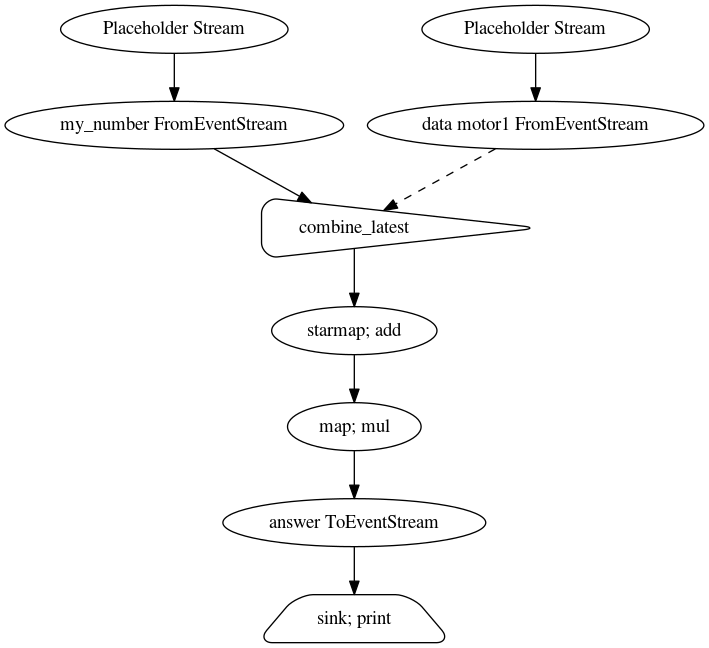

In [10]:
readable_graph.nodes['map; mul']['stream'].visualize()